In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size': 22}

matplotlib.rc('font', **font)

import numpy as np
import pandas as pd

import scipy
import scipy.stats
import seaborn as sns

import mrob

In [2]:
import sklearn.datasets

mean = np.array(0)
sigma = 0.03
norm_var = scipy.stats.multivariate_normal(mean,sigma)

In [3]:
N = 100_000
xi = np.zeros((N,6))
xi[:,1] = norm_var.rvs(N)/5
xi[:,2] = norm_var.rvs(N)
xi[:,3] = [1]*N + scipy.stats.multivariate_normal(0,0.00005).rvs(N)

In [4]:
df = pd.DataFrame(xi)

In [5]:
print(df)

         0         1         2         3    4    5
0      0.0  0.005656  0.293146  1.002825  0.0  0.0
1      0.0 -0.030656  0.148878  0.993009  0.0  0.0
2      0.0 -0.054161 -0.048995  1.002093  0.0  0.0
3      0.0  0.017760 -0.150617  0.991631  0.0  0.0
4      0.0 -0.044045  0.001541  0.999559  0.0  0.0
...    ...       ...       ...       ...  ...  ...
99995  0.0 -0.006726  0.209037  1.000120  0.0  0.0
99996  0.0 -0.025500  0.224549  1.001778  0.0  0.0
99997  0.0  0.008297 -0.118986  1.006819  0.0  0.0
99998  0.0  0.033786  0.014499  1.005373  0.0  0.0
99999  0.0 -0.019710 -0.005349  0.988495  0.0  0.0

[100000 rows x 6 columns]


In [6]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=2)

In [7]:
T_0 = mrob.geometry.SE3([0,0,0,0,0,0])
print(T_0.T())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [8]:
propagated = []


for i in range(len(xi)):
    tmp = mrob.geometry.SE3([0,0,0,0,0,0])
    tmp.update_lhs(xi[i])
    propagated.append(tmp)

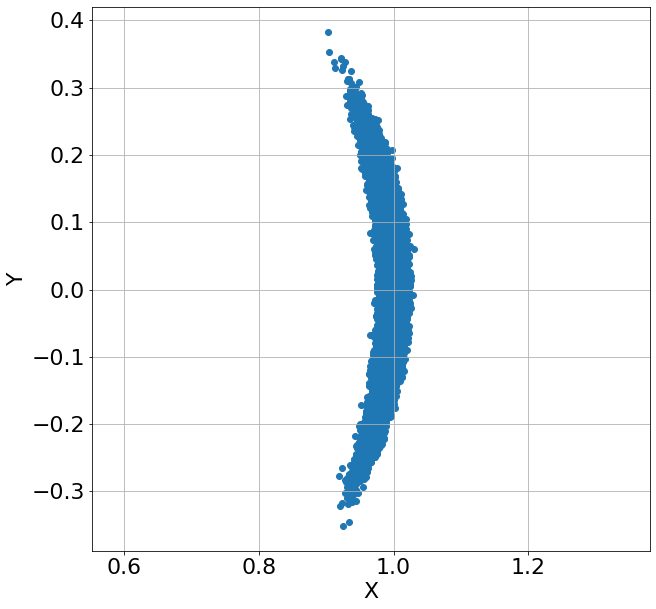

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,0],poses[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()

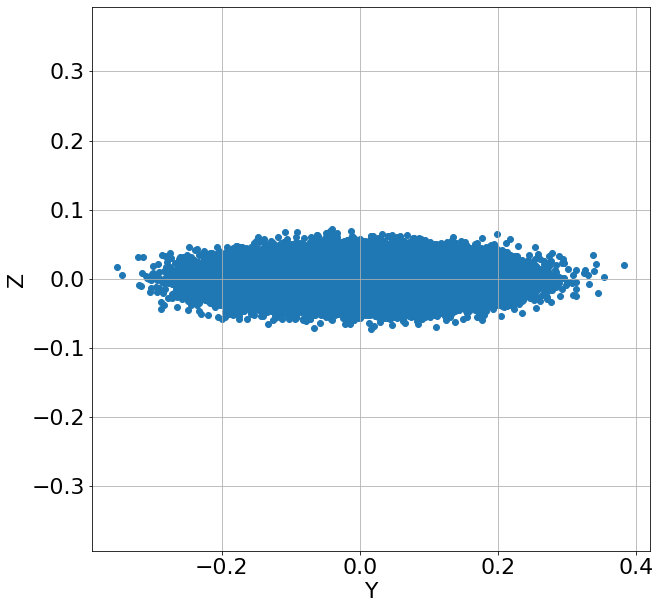

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

poses = np.array([x.t() for x in propagated])
poses = poses.reshape((-1,3))

plt.scatter(poses[:,1],poses[:,2])
plt.xlabel("Y")
plt.ylabel("Z")
plt.grid()
plt.axis('equal')
plt.show()